In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Nettoyage des bases de données

In [2]:
dfa = pd.read_csv(r'C:\Users\arceb\Desktop\Stage\BDD/attributaires_IDF.csv')
dfd = pd.read_csv(r'C:\Users\arceb\Desktop\Stage\BDD/demandeurs_IDF(1).csv')

C:\Users\arceb\AppData\Local\Temp\ipykernel_39428\35231794.py:1: DtypeWarning: Columns (7,8,25) have mixed types. Specify dtype option on import or set low_memory=False.
  dfa = pd.read_csv(r'C:\Users\arceb\Desktop\Stage\BDD/attributaires_IDF.csv')
C:\Users\arceb\AppData\Local\Temp\ipykernel_39428\35231794.py:2: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  dfd = pd.read_csv(r'C:\Users\arceb\Desktop\Stage\BDD/demandeurs_IDF(1).csv')


On va commencer par travailler sur la base de donnée des demandeurs pour estimer les différents quartiles de revenus parmis les demandeurs de la base de donnée. On va donc nettoyer la base, et créer une nouvelle colonne dans le dataframe indiquant le quartile auquel appartient le ménage. Cette information va permettre ensuite d'analyser le taux d'attente des demandeurs qui ont reçu un logement dans l'année en fonction de leur quartile d'appartenance.

In [3]:
dfd

,Unnamed: 0,région,Numéro Unique,Date création demande,Age demandeur,Situation familiale,Code département logement actuel,Code INSEE logt actuel,Commune logt actuel,Mode de logement actuel,...,Ressources mensuelles du foyer,"RFR du foyer, année n-1","RFR du foyer, année n-2",Code INSEE commune logt souhaité,Commune logement souhaité,Montant maxi (loyer+charges) supportable,Sexe demandeur\n,Nationalité demandeur\n,Autre logement dé\ntenu demandeur\n,Nb de personnes handicapees
0,0,Ile-de-France,175037900427000002,1979-03-01 00:00:00,59.0,Veuf (ve),75.0,75112.0,Paris 12ème arrondissement,Locataire parc privé,...,556.0,0.0,0.0,75056,Paris,300.0,F,Hors Union Européenne,Non,0.0
1,1,Ile-de-France,175018000669100002,1980-01-15 00:00:00,66.0,Célibataire,75.0,75113.0,Paris 13ème arrondissement,Locataire parc privé,...,1906.0,35847.0,36249.0,75113,Paris 13ème arrondissement,299.0,F,Française,Non,0.0
2,2,Ile-de-France,175028000646000002,1980-02-17 00:00:00,80.0,Célibataire,75.0,75113.0,Paris 13ème arrondissement,Propriétaire occupant,...,1446.0,11571.0,11534.0,75056,Paris,400.0,M,Française,Non,0.0
3,3,Ile-de-France,175028000574100002,1980-02-18 00:00:00,65.0,Célibataire,75.0,75104.0,Paris 4ème arrondissement,Locataire parc privé,...,2323.0,NaN,NaN,75101,Paris 1er arrondissement,750.0,F,Française,Oui,0.0
4,4,Ile-de-France,111091487693675056,1980-04-15 00:00:00,82.0,Célibataire,75.0,75114.0,Paris 14ème arrondissement,Locataire HLM,...,1447.0,14481.0,14322.0,75114,Paris 14ème arrondissement,300.0,F,Française,Non,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704518,704518,Ile-de-France,111011887480795219,2018-01-01 00:00:00,43.0,Célibataire,95.0,95219.0,Ermont,Structure d'hébergement,...,1067.0,NaN,NaN,95219,Ermont,600.0,M,Hors Union Européenne,Non,0.0
704519,704519,Ile-de-France,1110118890705AL003,2018-01-01 00:00:00,32.0,Célibataire,95.0,95205.0,Écouen,Locataire HLM,...,1643.0,NaN,15894.0,95205,Écouen,600.0,F,Française,Non,0.0
704520,704520,Ile-de-France,1110118912212AL003,2018-01-01 00:00:00,24.0,Célibataire,95.0,95018.0,Argenteuil,Chez vos parents ou vos enfants,...,1186.0,NaN,15014.0,95176,Cormeilles-en-Parisis,395.0,F,Française,Non,0.0
704521,704521,Ile-de-France,1110118918305AL003,2018-01-01 00:00:00,51.0,Marié (e),95.0,95018.0,Argenteuil,Sous-locataire ou hébergé dans un logement à t...,...,NaN,NaN,16018.0,95018,Argenteuil,630.0,M,Union Européenne,Non,0.0


In [4]:
dfd1=dfd[[ "Numéro Unique", "Nb unités de consommation du foyer", "Ressources mensuelles du foyer", "Date création demande", "Sexe demandeur\n", "Nationalité demandeur\n", "Age demandeur", "Situation familiale"]]
dfd1

,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Sexe demandeur\n,Nationalité demandeur\n,Age demandeur,Situation familiale
0,175037900427000002,1.0,556.0,1979-03-01 00:00:00,F,Hors Union Européenne,59.0,Veuf (ve)
1,175018000669100002,1.0,1906.0,1980-01-15 00:00:00,F,Française,66.0,Célibataire
2,175028000646000002,1.0,1446.0,1980-02-17 00:00:00,M,Française,80.0,Célibataire
3,175028000574100002,1.5,2323.0,1980-02-18 00:00:00,F,Française,65.0,Célibataire
4,111091487693675056,1.0,1447.0,1980-04-15 00:00:00,F,Française,82.0,Célibataire
...,...,...,...,...,...,...,...,...
704518,111011887480795219,1.0,1067.0,2018-01-01 00:00:00,M,Hors Union Européenne,43.0,Célibataire
704519,1110118890705AL003,1.3,1643.0,2018-01-01 00:00:00,F,Française,32.0,Célibataire
704520,1110118912212AL003,1.0,1186.0,2018-01-01 00:00:00,F,Française,24.0,Célibataire
704521,1110118918305AL003,2.0,NaN,2018-01-01 00:00:00,M,Union Européenne,51.0,Marié (e)


In [5]:
dfdx=dfd[[ "Numéro Unique", "Montant AL / APL"]]
dfax=dfa[[ "Numéro Unique", "Montant AL / APL"]]
dfx = dfdx.merge(dfax, on='Numéro Unique', how='inner')

In [6]:
dfx

,Numéro Unique,Montant AL / APL_x,Montant AL / APL_y
0,175037900427000002,0.0,0.0
1,175118000728300002,0.0,0.0
2,175108301617300002,0.0,0.0
3,175128420982700002,0.0,0.0
4,175058909634800002,235.0,235.0
...,...,...,...
60759,1111217905754AL003,0.0,0.0
60760,1111217849606GDPUB,0.0,0.0
60761,1111217849858GDPUB,NaN,NaN
60762,1110118850370GDPUB,0.0,0.0


On ne conserve que les colonnes qui vont nous intéresser dans le cadre de l'étude du taux d'attente.

#### Application des filtres

On convertir en NaN les valeurs qui doivent être filtrées, à savoir:
- les NaN (les valeurs qui ne sont pas renseignées), les revenus qui ne sont pas indiqués
- les revenus qui ne sont pas strictement supérieurs à 0
- les revenus qui sont supérieurs à 10000

In [7]:
dfd1.dropna()

,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Sexe demandeur\n,Nationalité demandeur\n,Age demandeur,Situation familiale
0,175037900427000002,1.0,556.0,1979-03-01 00:00:00,F,Hors Union Européenne,59.0,Veuf (ve)
1,175018000669100002,1.0,1906.0,1980-01-15 00:00:00,F,Française,66.0,Célibataire
2,175028000646000002,1.0,1446.0,1980-02-17 00:00:00,M,Française,80.0,Célibataire
3,175028000574100002,1.5,2323.0,1980-02-18 00:00:00,F,Française,65.0,Célibataire
4,111091487693675056,1.0,1447.0,1980-04-15 00:00:00,F,Française,82.0,Célibataire
...,...,...,...,...,...,...,...,...
704516,1110118856747AL010,2.1,2128.0,2018-01-01 00:00:00,M,Française,31.0,Marié (e)
704517,1110118874178AL010,1.8,4821.0,2018-01-01 00:00:00,F,Française,47.0,Divorcé (e)
704518,111011887480795219,1.0,1067.0,2018-01-01 00:00:00,M,Hors Union Européenne,43.0,Célibataire
704519,1110118890705AL003,1.3,1643.0,2018-01-01 00:00:00,F,Française,32.0,Célibataire


In [10]:
indexNames = dfd1[ dfd1['Ressources mensuelles du foyer'] < 0 ].index
dfd1.drop(indexNames , inplace=True)
dfd1

C:\Users\arceb\AppData\Local\Temp\ipykernel_39428\519414860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1.drop(indexNames , inplace=True)


,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Sexe demandeur\n,Nationalité demandeur\n,Age demandeur,Situation familiale
0,175037900427000002,1.0,556.0,1979-03-01 00:00:00,F,Hors Union Européenne,59.0,Veuf (ve)
1,175018000669100002,1.0,1906.0,1980-01-15 00:00:00,F,Française,66.0,Célibataire
2,175028000646000002,1.0,1446.0,1980-02-17 00:00:00,M,Française,80.0,Célibataire
3,175028000574100002,1.5,2323.0,1980-02-18 00:00:00,F,Française,65.0,Célibataire
4,111091487693675056,1.0,1447.0,1980-04-15 00:00:00,F,Française,82.0,Célibataire
...,...,...,...,...,...,...,...,...
704518,111011887480795219,1.0,1067.0,2018-01-01 00:00:00,M,Hors Union Européenne,43.0,Célibataire
704519,1110118890705AL003,1.3,1643.0,2018-01-01 00:00:00,F,Française,32.0,Célibataire
704520,1110118912212AL003,1.0,1186.0,2018-01-01 00:00:00,F,Française,24.0,Célibataire
704521,1110118918305AL003,2.0,NaN,2018-01-01 00:00:00,M,Union Européenne,51.0,Marié (e)


In [11]:
indexNames1 = dfd1[ dfd1['Ressources mensuelles du foyer'] > 10000 ].index
dfd1.drop(indexNames1 , inplace=True)
dfd1

C:\Users\arceb\AppData\Local\Temp\ipykernel_39428\2081586591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1.drop(indexNames1 , inplace=True)


,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Sexe demandeur\n,Nationalité demandeur\n,Age demandeur,Situation familiale
0,175037900427000002,1.0,556.0,1979-03-01 00:00:00,F,Hors Union Européenne,59.0,Veuf (ve)
1,175018000669100002,1.0,1906.0,1980-01-15 00:00:00,F,Française,66.0,Célibataire
2,175028000646000002,1.0,1446.0,1980-02-17 00:00:00,M,Française,80.0,Célibataire
3,175028000574100002,1.5,2323.0,1980-02-18 00:00:00,F,Française,65.0,Célibataire
4,111091487693675056,1.0,1447.0,1980-04-15 00:00:00,F,Française,82.0,Célibataire
...,...,...,...,...,...,...,...,...
704518,111011887480795219,1.0,1067.0,2018-01-01 00:00:00,M,Hors Union Européenne,43.0,Célibataire
704519,1110118890705AL003,1.3,1643.0,2018-01-01 00:00:00,F,Française,32.0,Célibataire
704520,1110118912212AL003,1.0,1186.0,2018-01-01 00:00:00,F,Française,24.0,Célibataire
704521,1110118918305AL003,2.0,NaN,2018-01-01 00:00:00,M,Union Européenne,51.0,Marié (e)


In [12]:
dfd1=dfd1.dropna()

In [13]:
dfd1

,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Sexe demandeur\n,Nationalité demandeur\n,Age demandeur,Situation familiale
0,175037900427000002,1.0,556.0,1979-03-01 00:00:00,F,Hors Union Européenne,59.0,Veuf (ve)
1,175018000669100002,1.0,1906.0,1980-01-15 00:00:00,F,Française,66.0,Célibataire
2,175028000646000002,1.0,1446.0,1980-02-17 00:00:00,M,Française,80.0,Célibataire
3,175028000574100002,1.5,2323.0,1980-02-18 00:00:00,F,Française,65.0,Célibataire
4,111091487693675056,1.0,1447.0,1980-04-15 00:00:00,F,Française,82.0,Célibataire
...,...,...,...,...,...,...,...,...
704516,1110118856747AL010,2.1,2128.0,2018-01-01 00:00:00,M,Française,31.0,Marié (e)
704517,1110118874178AL010,1.8,4821.0,2018-01-01 00:00:00,F,Française,47.0,Divorcé (e)
704518,111011887480795219,1.0,1067.0,2018-01-01 00:00:00,M,Hors Union Européenne,43.0,Célibataire
704519,1110118890705AL003,1.3,1643.0,2018-01-01 00:00:00,F,Française,32.0,Célibataire


dfd1 donne désormais la base de  données filtrée. On va pouvoir déterminer les quartiles de revenus.

#### Détermination des quartiles

On calcule dans un premier temps le revenu par unité de consommation.

In [14]:
UC=dfd1["Nb unités de consommation du foyer"]
revenu=dfd1["Ressources mensuelles du foyer"]
dfd1['revenu_par_UC']=revenu/UC
dfd1

C:\Users\arceb\AppData\Local\Temp\ipykernel_39428\2797935456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['revenu_par_UC']=revenu/UC


,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Sexe demandeur\n,Nationalité demandeur\n,Age demandeur,Situation familiale,revenu_par_UC
0,175037900427000002,1.0,556.0,1979-03-01 00:00:00,F,Hors Union Européenne,59.0,Veuf (ve),556.000000
1,175018000669100002,1.0,1906.0,1980-01-15 00:00:00,F,Française,66.0,Célibataire,1906.000000
2,175028000646000002,1.0,1446.0,1980-02-17 00:00:00,M,Française,80.0,Célibataire,1446.000000
3,175028000574100002,1.5,2323.0,1980-02-18 00:00:00,F,Française,65.0,Célibataire,1548.666667
4,111091487693675056,1.0,1447.0,1980-04-15 00:00:00,F,Française,82.0,Célibataire,1447.000000
...,...,...,...,...,...,...,...,...,...
704516,1110118856747AL010,2.1,2128.0,2018-01-01 00:00:00,M,Française,31.0,Marié (e),1013.333333
704517,1110118874178AL010,1.8,4821.0,2018-01-01 00:00:00,F,Française,47.0,Divorcé (e),2678.333333
704518,111011887480795219,1.0,1067.0,2018-01-01 00:00:00,M,Hors Union Européenne,43.0,Célibataire,1067.000000
704519,1110118890705AL003,1.3,1643.0,2018-01-01 00:00:00,F,Française,32.0,Célibataire,1263.846154


Il s'agit désormais de déterminer les quartiles.

In [15]:
dfd1['Revenus annuels']=dfd1['revenu_par_UC']*12 #le *12 est pour le revenu annuel

C:\Users\arceb\AppData\Local\Temp\ipykernel_39428\325979235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Revenus annuels']=dfd1['revenu_par_UC']*12 #le *12 est pour le revenu annuel


In [16]:
dfd1['Revenus annuels']

0          6672.000000
1         22872.000000
2         17352.000000
3         18584.000000
4         17364.000000
              ...     
704516    12160.000000
704517    32140.000000
704518    12804.000000
704519    15166.153846
704520    14232.000000
Name: Revenus annuels, Length: 689524, dtype: float64

In [17]:
dfd1['Revenus annuels'].describe()

count    689524.000000
mean      15155.877603
std        7747.455110
min           0.000000
25%        9732.000000
50%       14220.000000
75%       19200.000000
max      120000.000000
Name: Revenus annuels, dtype: float64

In [18]:
dfd1['Revenus annuels'].describe(percentiles=[.2, .4, .6, .8])#pour avoir les quintiles

count    689524.000000
mean      15155.877603
std        7747.455110
min           0.000000
20%        8880.000000
40%       12354.285714
50%       14220.000000
60%       15960.000000
80%       20560.000000
max      120000.000000
Name: Revenus annuels, dtype: float64

On a les quantiles de revenu annuel :
- 20%= 8989
- 40%= 12410
- 60%= 14275
- 80%= 20604

A partir de ces valeurs on va déterminer dans une nouvelle colonne 5 groupes de quintiles d'appartenance des demandeurs.

In [19]:
dfd1['Quintile'] = ""

C:\Users\arceb\AppData\Local\Temp\ipykernel_39428\1676404251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Quintile'] = ""


In [20]:
dfd1['Quintile']=pd.cut(dfd1['Revenus annuels'], [0,8989, 12410, 14275, 20604, 120000], labels=['Premier Quintile', 'Deuxième Quintile', 'Troisième Quintile', 'Quatrième Quintile', 'Cinquième Quintile'])

C:\Users\arceb\AppData\Local\Temp\ipykernel_39428\1534071720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Quintile']=pd.cut(dfd1['Revenus annuels'], [0,8989, 12410, 14275, 20604, 120000], labels=['Premier Quintile', 'Deuxième Quintile', 'Troisième Quintile', 'Quatrième Quintile', 'Cinquième Quintile'])


In [21]:
dfd1

,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Sexe demandeur\n,Nationalité demandeur\n,Age demandeur,Situation familiale,revenu_par_UC,Revenus annuels,Quintile
0,175037900427000002,1.0,556.0,1979-03-01 00:00:00,F,Hors Union Européenne,59.0,Veuf (ve),556.000000,6672.000000,Premier Quintile
1,175018000669100002,1.0,1906.0,1980-01-15 00:00:00,F,Française,66.0,Célibataire,1906.000000,22872.000000,Cinquième Quintile
2,175028000646000002,1.0,1446.0,1980-02-17 00:00:00,M,Française,80.0,Célibataire,1446.000000,17352.000000,Quatrième Quintile
3,175028000574100002,1.5,2323.0,1980-02-18 00:00:00,F,Française,65.0,Célibataire,1548.666667,18584.000000,Quatrième Quintile
4,111091487693675056,1.0,1447.0,1980-04-15 00:00:00,F,Française,82.0,Célibataire,1447.000000,17364.000000,Quatrième Quintile
...,...,...,...,...,...,...,...,...,...,...,...
704516,1110118856747AL010,2.1,2128.0,2018-01-01 00:00:00,M,Française,31.0,Marié (e),1013.333333,12160.000000,Deuxième Quintile
704517,1110118874178AL010,1.8,4821.0,2018-01-01 00:00:00,F,Française,47.0,Divorcé (e),2678.333333,32140.000000,Cinquième Quintile
704518,111011887480795219,1.0,1067.0,2018-01-01 00:00:00,M,Hors Union Européenne,43.0,Célibataire,1067.000000,12804.000000,Troisième Quintile
704519,1110118890705AL003,1.3,1643.0,2018-01-01 00:00:00,F,Française,32.0,Célibataire,1263.846154,15166.153846,Quatrième Quintile


#### Création des tranches d'âge

In [22]:
dfd1['Age'] = ""
dfd1['Age']=pd.cut(dfd1['Age demandeur'], [0, 29, 39, 49, 59, 69, 130], labels=['0 à 29 ans', '30 à 39 ans', '40 à 49 ans', '50 à 59 ans', '60 à 69ans', '70 ans et plus'])
dfd1

C:\Users\arceb\AppData\Local\Temp\ipykernel_39428\2946466155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Age'] = ""
C:\Users\arceb\AppData\Local\Temp\ipykernel_39428\2946466155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Age']=pd.cut(dfd1['Age demandeur'], [0, 29, 39, 49, 59, 69, 130], labels=['0 à 29 ans', '30 à 39 ans', '40 à 49 ans', '50 à 59 ans', '60 à 69ans', '70 ans et plus'])


,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Sexe demandeur\n,Nationalité demandeur\n,Age demandeur,Situation familiale,revenu_par_UC,Revenus annuels,Quintile,Age
0,175037900427000002,1.0,556.0,1979-03-01 00:00:00,F,Hors Union Européenne,59.0,Veuf (ve),556.000000,6672.000000,Premier Quintile,50 à 59 ans
1,175018000669100002,1.0,1906.0,1980-01-15 00:00:00,F,Française,66.0,Célibataire,1906.000000,22872.000000,Cinquième Quintile,60 à 69ans
2,175028000646000002,1.0,1446.0,1980-02-17 00:00:00,M,Française,80.0,Célibataire,1446.000000,17352.000000,Quatrième Quintile,70 ans et plus
3,175028000574100002,1.5,2323.0,1980-02-18 00:00:00,F,Française,65.0,Célibataire,1548.666667,18584.000000,Quatrième Quintile,60 à 69ans
4,111091487693675056,1.0,1447.0,1980-04-15 00:00:00,F,Française,82.0,Célibataire,1447.000000,17364.000000,Quatrième Quintile,70 ans et plus
...,...,...,...,...,...,...,...,...,...,...,...,...
704516,1110118856747AL010,2.1,2128.0,2018-01-01 00:00:00,M,Française,31.0,Marié (e),1013.333333,12160.000000,Deuxième Quintile,30 à 39 ans
704517,1110118874178AL010,1.8,4821.0,2018-01-01 00:00:00,F,Française,47.0,Divorcé (e),2678.333333,32140.000000,Cinquième Quintile,40 à 49 ans
704518,111011887480795219,1.0,1067.0,2018-01-01 00:00:00,M,Hors Union Européenne,43.0,Célibataire,1067.000000,12804.000000,Troisième Quintile,40 à 49 ans
704519,1110118890705AL003,1.3,1643.0,2018-01-01 00:00:00,F,Française,32.0,Célibataire,1263.846154,15166.153846,Quatrième Quintile,30 à 39 ans


#### Travail sur le taux d'attente

Pour travailler sur le taux d'attente, on va fusionner à notre base de données des demandeurs filtrée à la base attributaires et calculer les taux d'attente des personnes attributaires dans l'année en fonction de la date de leur demande et de la date de leur acceptation.

In [23]:
dfa = pd.read_csv(r'C:\Users\arceb\Desktop\Stage\BDD/attributaires_IDF.csv')

C:\Users\arceb\AppData\Local\Temp\ipykernel_39428\988554171.py:1: DtypeWarning: Columns (7,8,25) have mixed types. Specify dtype option on import or set low_memory=False.
  dfa = pd.read_csv(r'C:\Users\arceb\Desktop\Stage\BDD/attributaires_IDF.csv')


In [24]:
dfa

,Unnamed: 0,région,Numéro Unique,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Code département logement actuel,Code INSEE logt actuel,Commune logt actuel,...,Code de la commune attribuée,Région du logement attribué,Type du logement attribué,Est en QPV,Surface du logement attribué,Statut DALO,Date de la décision DALO\n\n,Accompagnement social,Diagnostic social,Réservataire
0,0,Ile-de-France,175037900427000002,1979-03-01 00:00:00,2018-04-13 00:00:00,59,Veuf (ve),75,75112.0,Paris 12ème arrondissement,...,75120,Ile-de-France,T1,Oui,20,Actif relogé,2012-06-15 00:00:00,Non,Non,"Contingent des collectivités territoriales, de..."
1,1,Ile-de-France,175118000728300002,1980-11-14 00:00:00,2018-06-04 00:00:00,72,Veuf (ve),75,75117.0,Paris 17ème arrondissement,...,75117,Ile-de-France,T2,Non,44,Actif relogé,2013-07-12 00:00:00,Non,Non,Contingent autres réservataires
2,2,Ile-de-France,211048217550092024,1982-04-01 00:00:00,2018-11-27 00:00:00,91,Divorcé (e),92,92024.0,Clichy,...,92024,Ile-de-France,T1,Non,35,Non renseigné,NaN,Non,Non,"Contingent des collectivités territoriales, de..."
3,3,Ile-de-France,175108301617300002,1983-10-17 00:00:00,2018-10-30 00:00:00,64,Célibataire,75,75111.0,Paris 11ème arrondissement,...,75119,Ile-de-France,T2,Non,55,Non renseigné,NaN,Non,Non,Hors contingent
4,4,Ile-de-France,175128420982700002,1984-12-01 00:00:00,2018-04-10 00:00:00,57,Célibataire,75,75119.0,Paris 19ème arrondissement,...,75120,Ile-de-France,T2,Non,53,Non renseigné,NaN,Non,Non,"Contingent des collectivités territoriales, de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153709,153709,Ile-de-France,1111218129847GDPUB,2018-12-19 00:00:00,2019-01-01 00:00:00,70,Marié (e),78,78440.0,Les Mureaux,...,78361,Ile-de-France,T2,Oui,47,Non renseigné,NaN,Non,Non,Contingent autres réservataires
153710,153710,Ile-de-France,111121812788778498,2018-12-20 00:00:00,2018-12-21 00:00:00,51,Célibataire,78,78498.0,Poissy,...,78498,Ile-de-France,T2,Oui,46,Non renseigné,NaN,Non,Non,Contingent commune
153711,153711,Ile-de-France,111121812792310122,2018-12-20 00:00:00,2018-12-28 00:00:00,86,Veuf (ve),78,78440.0,Les Mureaux,...,78314,Ile-de-France,T2,Non,53,Non renseigné,NaN,Non,Non,Hors contingent
153712,153712,Ile-de-France,111121813038177438,2018-12-21 00:00:00,2018-12-31 00:00:00,48,Concubin (e),77,77438.0,Saint-Thibault-des-Vignes,...,77243,Ile-de-France,T3,Non,63,Non renseigné,NaN,Non,Non,Contingent département


In [25]:
dfa1=dfa[[ "Numéro Unique", "Composition foyer demandeur", "Situation professionnelle demandeur", "Type du logement attribué", "Statut DALO", "Date de la radiation"]]
dfa1

,Numéro Unique,Composition foyer demandeur,Situation professionnelle demandeur,Type du logement attribué,Statut DALO,Date de la radiation
0,175037900427000002,Personne seule,Retraité,T1,Actif relogé,2018-04-13 00:00:00
1,175118000728300002,Personne seule,Retraité,T2,Actif relogé,2018-06-04 00:00:00
2,211048217550092024,Personne seule,Retraité,T1,Non renseigné,2018-11-27 00:00:00
3,175108301617300002,Au moins 2 cotitulaires,Retraité,T2,Non renseigné,2018-10-30 00:00:00
4,175128420982700002,Personne seule,CDI (ou fonctionnaire),T2,Non renseigné,2018-04-10 00:00:00
...,...,...,...,...,...,...
153709,1111218129847GDPUB,Au moins 2 cotitulaires,Retraité,T2,Non renseigné,2019-01-01 00:00:00
153710,111121812788778498,Personne seule,Autre,T2,Non renseigné,2018-12-21 00:00:00
153711,111121812792310122,Personne seule,Retraité,T2,Non renseigné,2018-12-28 00:00:00
153712,111121813038177438,Au moins 2 cotitulaires avec 2 personnes à charge,CDI,T3,Non renseigné,2018-12-31 00:00:00


In [26]:
base = dfd1.merge(dfa1, on='Numéro Unique', how='inner')
base

,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Sexe demandeur\n,Nationalité demandeur\n,Age demandeur,Situation familiale,revenu_par_UC,Revenus annuels,Quintile,Age,Composition foyer demandeur,Situation professionnelle demandeur,Type du logement attribué,Statut DALO,Date de la radiation
0,175037900427000002,1.0,556.0,1979-03-01 00:00:00,F,Hors Union Européenne,59.0,Veuf (ve),556.000000,6672.0,Premier Quintile,50 à 59 ans,Personne seule,Retraité,T1,Actif relogé,2018-04-13 00:00:00
1,175118000728300002,1.0,1763.0,1980-11-14 00:00:00,F,Française,72.0,Veuf (ve),1763.000000,21156.0,Cinquième Quintile,70 ans et plus,Personne seule,Retraité,T2,Actif relogé,2018-06-04 00:00:00
2,175108301617300002,1.5,3535.0,1983-10-17 00:00:00,F,Française,64.0,Célibataire,2356.666667,28280.0,Cinquième Quintile,60 à 69ans,Au moins 2 cotitulaires,Retraité,T2,Non renseigné,2018-10-30 00:00:00
3,175128420982700002,1.0,3144.0,1984-12-01 00:00:00,F,Française,57.0,Célibataire,3144.000000,37728.0,Cinquième Quintile,50 à 59 ans,Personne seule,CDI (ou fonctionnaire),T2,Non renseigné,2018-04-10 00:00:00
4,175058909634800002,1.0,765.0,1989-05-16 00:00:00,M,Française,69.0,Célibataire,765.000000,9180.0,Deuxième Quintile,60 à 69ans,Personne seule,Retraité,T2,Actif relogé,2018-09-06 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60238,1111217905754AL003,1.0,3072.0,2017-12-28 00:00:00,M,Française,28.0,Célibataire,3072.000000,36864.0,Cinquième Quintile,0 à 29 ans,Personne seule,"CDD,Stage, intérim",T2,Non renseigné,2018-09-27 00:00:00
60239,1111217849606GDPUB,1.0,1774.0,2017-12-29 00:00:00,F,Française,37.0,Divorcé (e),1774.000000,21288.0,Cinquième Quintile,30 à 39 ans,Personne seule,CDI,T2,Non renseigné,2018-10-19 00:00:00
60240,1111217849858GDPUB,1.0,2143.0,2017-12-29 00:00:00,F,Hors Union Européenne,28.0,Célibataire,2143.000000,25716.0,Cinquième Quintile,0 à 29 ans,Personne seule,CDI,T2,Non renseigné,2018-12-05 00:00:00
60241,1110118850370GDPUB,1.0,1190.0,2018-01-01 00:00:00,M,Hors Union Européenne,36.0,Célibataire,1190.000000,14280.0,Quatrième Quintile,30 à 39 ans,Personne seule,"CDD,Stage, intérim",T1,Non renseigné,2018-12-07 00:00:00


In [27]:
bdd=base[[ "Revenus annuels",  "Quintile", "Date création demande", "Date de la radiation", "Age", "Numéro Unique", "Type du logement attribué"]]

In [28]:
bdd.rename(columns={'Date création demande_y': 'Date création demande'}, inplace=True)
bdd

C:\Users\arceb\AppData\Local\Temp\ipykernel_39428\51515142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdd.rename(columns={'Date création demande_y': 'Date création demande'}, inplace=True)


,Revenus annuels,Quintile,Date création demande,Date de la radiation,Age,Numéro Unique,Type du logement attribué
0,6672.0,Premier Quintile,1979-03-01 00:00:00,2018-04-13 00:00:00,50 à 59 ans,175037900427000002,T1
1,21156.0,Cinquième Quintile,1980-11-14 00:00:00,2018-06-04 00:00:00,70 ans et plus,175118000728300002,T2
2,28280.0,Cinquième Quintile,1983-10-17 00:00:00,2018-10-30 00:00:00,60 à 69ans,175108301617300002,T2
3,37728.0,Cinquième Quintile,1984-12-01 00:00:00,2018-04-10 00:00:00,50 à 59 ans,175128420982700002,T2
4,9180.0,Deuxième Quintile,1989-05-16 00:00:00,2018-09-06 00:00:00,60 à 69ans,175058909634800002,T2
...,...,...,...,...,...,...,...
60238,36864.0,Cinquième Quintile,2017-12-28 00:00:00,2018-09-27 00:00:00,0 à 29 ans,1111217905754AL003,T2
60239,21288.0,Cinquième Quintile,2017-12-29 00:00:00,2018-10-19 00:00:00,30 à 39 ans,1111217849606GDPUB,T2
60240,25716.0,Cinquième Quintile,2017-12-29 00:00:00,2018-12-05 00:00:00,0 à 29 ans,1111217849858GDPUB,T2
60241,14280.0,Quatrième Quintile,2018-01-01 00:00:00,2018-12-07 00:00:00,30 à 39 ans,1110118850370GDPUB,T1


In [29]:
#!pip install datetime

In [30]:
import datetime
from datetime import timedelta

In [31]:
bdd['Date création demande'] = pd.to_datetime(bdd['Date création demande'], format="%Y/%m/%d %H:%M:%S")

C:\Users\arceb\AppData\Local\Temp\ipykernel_39428\1835229834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdd['Date création demande'] = pd.to_datetime(bdd['Date création demande'], format="%Y/%m/%d %H:%M:%S")


In [32]:
bdd['Date de la radiation'] = pd.to_datetime(bdd['Date de la radiation'], format="%Y/%m/%d %H:%M:%S")
bdd

C:\Users\arceb\AppData\Local\Temp\ipykernel_39428\1171770445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdd['Date de la radiation'] = pd.to_datetime(bdd['Date de la radiation'], format="%Y/%m/%d %H:%M:%S")


,Revenus annuels,Quintile,Date création demande,Date de la radiation,Age,Numéro Unique,Type du logement attribué
0,6672.0,Premier Quintile,1979-03-01,2018-04-13,50 à 59 ans,175037900427000002,T1
1,21156.0,Cinquième Quintile,1980-11-14,2018-06-04,70 ans et plus,175118000728300002,T2
2,28280.0,Cinquième Quintile,1983-10-17,2018-10-30,60 à 69ans,175108301617300002,T2
3,37728.0,Cinquième Quintile,1984-12-01,2018-04-10,50 à 59 ans,175128420982700002,T2
4,9180.0,Deuxième Quintile,1989-05-16,2018-09-06,60 à 69ans,175058909634800002,T2
...,...,...,...,...,...,...,...
60238,36864.0,Cinquième Quintile,2017-12-28,2018-09-27,0 à 29 ans,1111217905754AL003,T2
60239,21288.0,Cinquième Quintile,2017-12-29,2018-10-19,30 à 39 ans,1111217849606GDPUB,T2
60240,25716.0,Cinquième Quintile,2017-12-29,2018-12-05,0 à 29 ans,1111217849858GDPUB,T2
60241,14280.0,Quatrième Quintile,2018-01-01,2018-12-07,30 à 39 ans,1110118850370GDPUB,T1


In [33]:
timedelta = bdd['Date de la radiation']-bdd['Date création demande']
bdd['Temps attente']= timedelta
bdd

C:\Users\arceb\AppData\Local\Temp\ipykernel_39428\1878810048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdd['Temps attente']= timedelta


,Revenus annuels,Quintile,Date création demande,Date de la radiation,Age,Numéro Unique,Type du logement attribué,Temps attente
0,6672.0,Premier Quintile,1979-03-01,2018-04-13,50 à 59 ans,175037900427000002,T1,14288 days
1,21156.0,Cinquième Quintile,1980-11-14,2018-06-04,70 ans et plus,175118000728300002,T2,13716 days
2,28280.0,Cinquième Quintile,1983-10-17,2018-10-30,60 à 69ans,175108301617300002,T2,12797 days
3,37728.0,Cinquième Quintile,1984-12-01,2018-04-10,50 à 59 ans,175128420982700002,T2,12183 days
4,9180.0,Deuxième Quintile,1989-05-16,2018-09-06,60 à 69ans,175058909634800002,T2,10705 days
...,...,...,...,...,...,...,...,...
60238,36864.0,Cinquième Quintile,2017-12-28,2018-09-27,0 à 29 ans,1111217905754AL003,T2,273 days
60239,21288.0,Cinquième Quintile,2017-12-29,2018-10-19,30 à 39 ans,1111217849606GDPUB,T2,294 days
60240,25716.0,Cinquième Quintile,2017-12-29,2018-12-05,0 à 29 ans,1111217849858GDPUB,T2,341 days
60241,14280.0,Quatrième Quintile,2018-01-01,2018-12-07,30 à 39 ans,1110118850370GDPUB,T1,340 days


In [37]:
attente=bdd[[ "Quintile", "Temps attente"]]

In [38]:
dfplot = attente.groupby('Quintile').mean()

In [39]:
dfplot

,Temps attente
Quintile,
Premier Quintile,1397 days 11:37:46.455596016
Deuxième Quintile,1341 days 19:34:03.337363968
Troisième Quintile,1229 days 15:48:11.704877040
Quatrième Quintile,1092 days 00:41:32.725526944
Cinquième Quintile,953 days 03:36:45.701364768


In [40]:
dfplot['Temps attente'] = dfplot['Temps attente'].values.astype(np.int64)

In [41]:
dfplot

,Temps attente
Quintile,
Premier Quintile,120742666455596016
Deuxième Quintile,115932843337363968
Troisième Quintile,106242491704877040
Quatrième Quintile,94351292725526944
Cinquième Quintile,82352205701364768


In [42]:
dfplot['Temps attente']=(dfplot['Temps attente']//(86400000000000)) #attention ici on fait un arrondi, il faut le préciser

In [43]:
dfplot

,Temps attente
Quintile,
Premier Quintile,1397
Deuxième Quintile,1341
Troisième Quintile,1229
Quatrième Quintile,1092
Cinquième Quintile,953


Text(0, 0.5, "Temps d'attente moyen pour obtenir un logement social (en jours)")

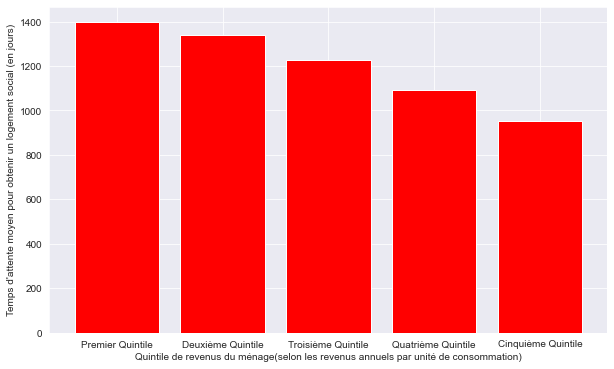

In [44]:
dfplot.reset_index(inplace=True)
fig = plt.figure(1, figsize=(10, 6))
plt.bar(dfplot["Quintile"], dfplot['Temps attente'], color="red")
plt.xlabel('Quintile de revenus du ménage(selon les revenus annuels par unité de consommation)')
plt.ylabel("Temps d'attente moyen pour obtenir un logement social (en jours)")

In [47]:
attente2=bdd[[ "Age", "Temps attente"]]
dfplot2 = attente2.groupby('Age').mean()
dfplot2['Temps attente'] = dfplot2['Temps attente'].values.astype(np.int64)
dfplot2['Temps attente']=(dfplot2['Temps attente']//(86400000000000))

In [48]:
dfplot2.reset_index(inplace=True)
fig = plt.figure(1, figsize=(5, 5))

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Age du demandeur')

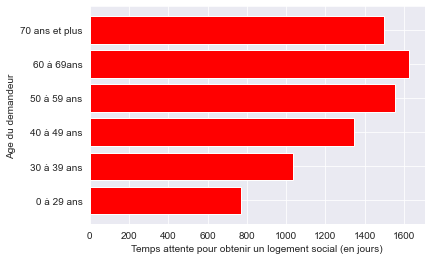

In [50]:
plt.barh(dfplot2["Age"], dfplot2['Temps attente'], color="red")
plt.xlabel("Temps attente pour obtenir un logement social (en jours)")
plt.ylabel('Age du demandeur')

In [53]:
attente3=bdd[[ "Type du logement attribué", "Temps attente"]]
dfplot3 = attente3.groupby('Type du logement attribué').mean()
dfplot3['Temps attente'] = dfplot3['Temps attente'].values.astype(np.int64)
dfplot3['Temps attente']=(dfplot3['Temps attente']//(86400000000000))

In [54]:
dfplot3.reset_index(inplace=True)
fig = plt.figure(1, figsize=(5, 5))

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Type du logement attribué')

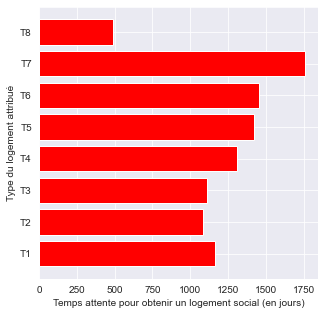

In [55]:
fig = plt.figure(1, figsize=(5, 5))
plt.barh(dfplot3["Type du logement attribué"], dfplot3['Temps attente'], color="red")
plt.xlabel("Temps attente pour obtenir un logement social (en jours)")
plt.ylabel('Type du logement attribué')

In [57]:
dfplot3

,Type du logement attribué,Temps attente
0,T1,1162
1,T2,1083
2,T3,1109
3,T4,1310
4,T5,1422
5,T6,1457
6,T7,1757
7,T8,490


Il faudrait réarranger le graph au niveau de la lisibilité. On pourrait aussi créer une fonction qui donne le graph en fonction d'une colonne en entrée (motif, quintile, sexe, tranches d'âge,....). Il faudrait pour cela au préalable avoir un dataframe nettoyé. Trier aussi par ordre croissant les motifs avec la commande sort.

Sur les motifs on a l'impression que c'est pour les motfis relatifs à des mobilités professionnelles, ou liés à des violences conjugales que le temps est moins loin (pour les gens qui ont une certane stabilité professionnelle, ou pour les cas d'extrême urgence). Je ne comprends pas trop ce que fait le "assistante maternelle" dans la liste.

## Automatisation